In [1]:
## Load the required packages

import sys
import subprocess

#implement pip as a subprocess:
subprocess.check_call([sys.executable, '-m', 'pip', 'install','pandas'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install','numpy'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install','sklearn'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install','statsmodels'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install','seaborn'])

import numpy as np
import pandas as pd
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

# python or jupyter notebook usually only play the last call, so we need the above code to make every call can be seen
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# import data and get basic information
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.info
test.info

test["casual"]=0
test["registered"]=0
test["count"]=0
test["traintest"]='test'
train["traintest"]='train'

all_data=pd.concat((train,test))
all_data

<bound method DataFrame.info of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0  

<bound method DataFrame.info of                  datetime  season  holiday  workingday  weather   temp  \
0     2011-01-20 00:00:00       1        0           1        1  10.66   
1     2011-01-20 01:00:00       1        0           1        1  10.66   
2     2011-01-20 02:00:00       1        0           1        1  10.66   
3     2011-01-20 03:00:00       1        0           1        1  10.66   
4     2011-01-20 04:00:00       1        0           1        1  10.66   
...                   ...     ...      ...         ...      ...    ...   
6488  2012-12-31 19:00:00       1        0           1        2  10.66   
6489  2012-12-31 20:00:00       1        0           1        2  10.66   
6490  2012-12-31 21:00:00       1        0           1        1  10.66   
6491  2012-12-31 22:00:00       1        0           1        1  10.66   
6492  2012-12-31 23:00:00       1        0           1        1  10.66   

       atemp  humidity  windspeed  
0     11.365        56    26.0027  
1     1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,traintest
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,0,0,test
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0,0,0,test


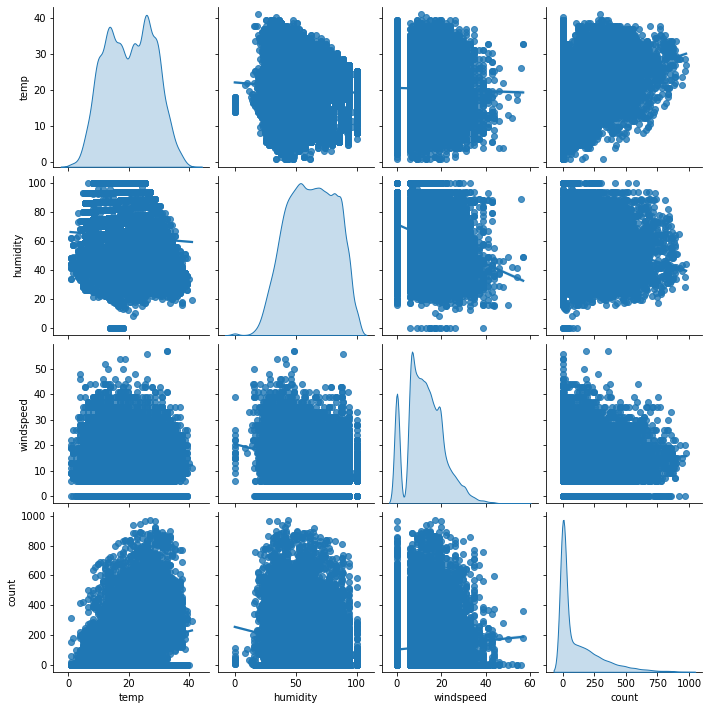

In [3]:
# identify categorical variables
categorical = ['season','holiday','workingday','weather']

# identify numeric variables
numeric = ['temp', 'humidity','windspeed','count']


## Data Visualization
# pairplots
sns.pairplot(all_data[numeric],kind='reg', diag_kind='kde')
plt.show()

# From the pairplot we find that the variable 'temp' which means temperature has the relative highest positive vorreltion with the response parameter.

In [4]:
## Decomposing datetime variable to year, month, hour and day of the week

all_data['year'] = pd.DatetimeIndex(all_data['datetime']).year
all_data['month'] = pd.DatetimeIndex(all_data['datetime']).month
all_data['day'] = pd.DatetimeIndex(all_data['datetime']).day
all_data['hour_of_day'] = pd.DatetimeIndex(all_data['datetime']).hour 
all_data['day_of_week'] = pd.DatetimeIndex(all_data['datetime']).dayofweek 
all_data['weekday'] = ((pd.DatetimeIndex(all_data['datetime']).dayofweek) // 5 == 1).astype(float)

# specify Seasons, Workingdays, Holidays, Weathers, Months
all_data['season'] = all_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
all_data['weekday'] = all_data['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
all_data['month'] = all_data['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 
                                           8: 'Aug', 9: 'Sep', 10: 'Oct',11: 'Nov', 12:'Dec'})
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,traintest,year,month,day,hour_of_day,day_of_week,weekday
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,train,2011,Jan,1,0,5,Mon
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,train,2011,Jan,1,1,5,Mon
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,train,2011,Jan,1,2,5,Mon
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,train,2011,Jan,1,3,5,Mon
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,train,2011,Jan,1,4,5,Mon


<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

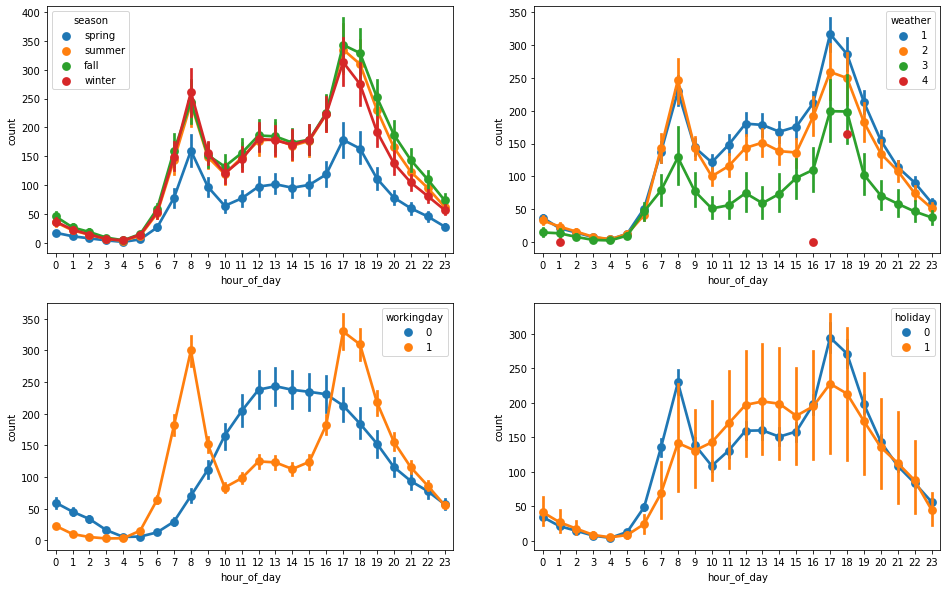

In [5]:
fig, axes = plt.subplots(2,2,figsize = (16, 10))
ax11 = plt.subplot(2,2,1)
sns.pointplot(x=all_data['hour_of_day'] , y=all_data['count'] , hue = all_data['season'] , 
              ax = ax11, title = 'The influence of hour of day of season')

ax12 = plt.subplot(2,2,2)
sns.pointplot(x=all_data['hour_of_day'] , y=all_data['count'] , hue = all_data['weather'] ,
              ax = ax12,title = 'The influence of hour of day of weather')

ax2 = plt.subplot(2,2,3)
sns.pointplot(x=all_data['hour_of_day'] , y=all_data['count'] , hue = all_data['workingday'] , 
              ax = ax2, title = 'The influence of hour of day of working day')

ax3 = plt.subplot(2,2,4)
sns.pointplot(x=all_data['hour_of_day'] , y=all_data['count'] , hue = all_data['holiday'] , 
              ax = ax3,title = 'The influence of hour of day of holiday')


## Through the plots, we find that during winter and spring, the usage of bicyles is smaller than other seasons.
## Whether it is a holiday or workday does not have a great influence on the usage of bicycle.

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation between prediction variables')

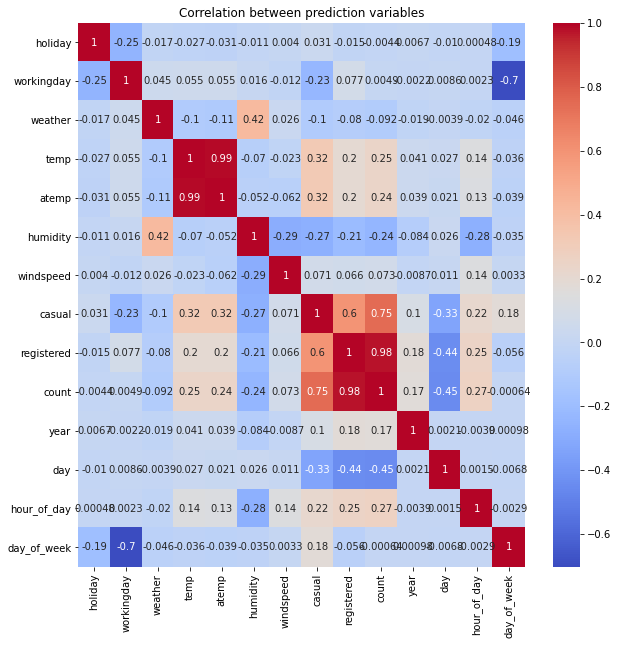

In [6]:
## Correlation between prediction variables
cor = all_data.corr()
figure,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap='coolwarm')
ax.set_title("Correlation between prediction variables")
plt.show()

,temp,count
temp,1.000000,0.245778
count,0.245778,1.000000


<AxesSubplot:xlabel='temp', ylabel='count'>

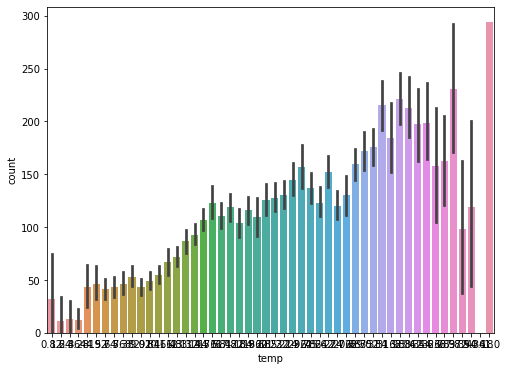

In [7]:
## The relationship between temperature and count
fig, axes = plt.subplots(1,1,figsize = (8,6))
all_data[['temp','count']].corr()
sns.barplot(x=all_data['temp'] ,y=all_data['count'])

## The correlation is not very strong, but it is still positive.
## According to the plot, we find that there is a blank column. 

,humidity,count
humidity,1.000000,-0.240892
count,-0.240892,1.000000


<AxesSubplot:xlabel='humidity', ylabel='count'>

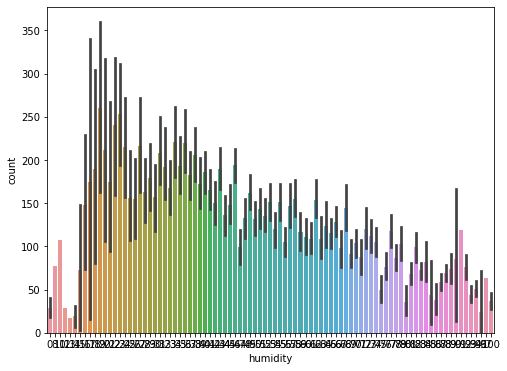

In [8]:
## The relationship between humidity and count
fig, axes = plt.subplots(1,1,figsize = (8,6))
all_data[['humidity','count']].corr()
sns.barplot(x=all_data['humidity'] ,y=all_data['count'])

## The correlation is negative.

,windspeed,count
windspeed,1.0000,0.0725
count,0.0725,1.0000


<AxesSubplot:xlabel='windspeed', ylabel='count'>

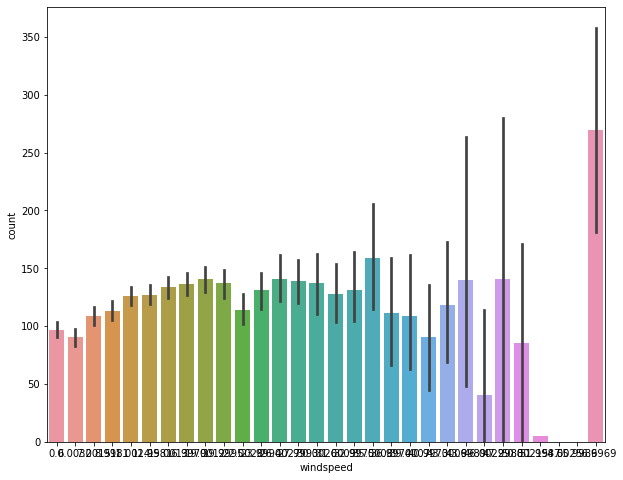

In [9]:
## The relationship between wind speed and count

fig, axes = plt.subplots(1,1,figsize = (10,8))
all_data[['windspeed','count']].corr()
sns.barplot(x=all_data['windspeed'] ,y=all_data['count'])

## The wind speed is relatively not so related to the result.

<AxesSubplot:xlabel='hour_of_day'>

Text(0.5, 1.0, 'Plot of registered users demand')

<AxesSubplot:xlabel='hour_of_day'>

Text(0.5, 1.0, 'Plot of casual users demand')

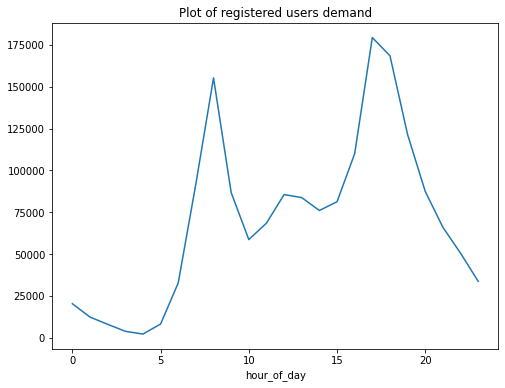

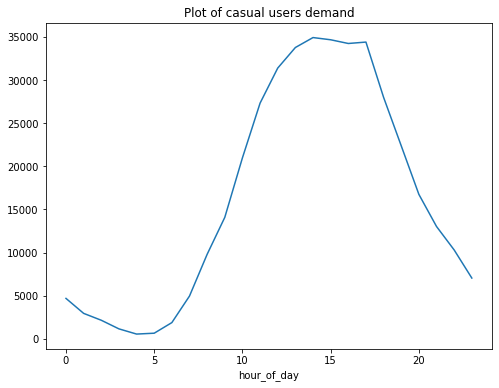

In [10]:
# registered users
fig, axes = plt.subplots(figsize = (8,6))
all_data.groupby('hour_of_day').sum()['registered'].sort_index().plot(kind='line')
axes.set_title("Plot of registered users demand")

# casual users
fig, axes = plt.subplots(figsize = (8,6))
all_data.groupby('hour_of_day').sum()['casual'].sort_index().plot(kind='line')
axes.set_title("Plot of casual users demand")
# There is a small difference in demand between registered users and casual users during different hours.

<AxesSubplot:ylabel='count'>

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Boxplot of Count')]

<AxesSubplot:xlabel='season', ylabel='count'>

[Text(0.5, 0, 'Season'), Text(0.5, 1.0, 'Boxplot of Season Vs Count')]

<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

[Text(0.5, 0, 'Hour of day'),
 Text(0.5, 1.0, 'Boxplot of Hour of day Vs Count')]

<AxesSubplot:xlabel='workingday', ylabel='count'>

[Text(0.5, 0, 'Workingday'), Text(0.5, 1.0, 'Boxplot of Wokingday Vs Count')]

<AxesSubplot:xlabel='holiday', ylabel='count'>

[Text(0.5, 3.200000000000003, 'Holiday'),
 Text(0.5, 1.0, 'Boxplot of Holiday Vs Count')]

<AxesSubplot:xlabel='month', ylabel='count'>

[Text(0.5, 3.200000000000003, 'Month'),
 Text(0.5, 1.0, 'Boxplot of Month Vs Count')]

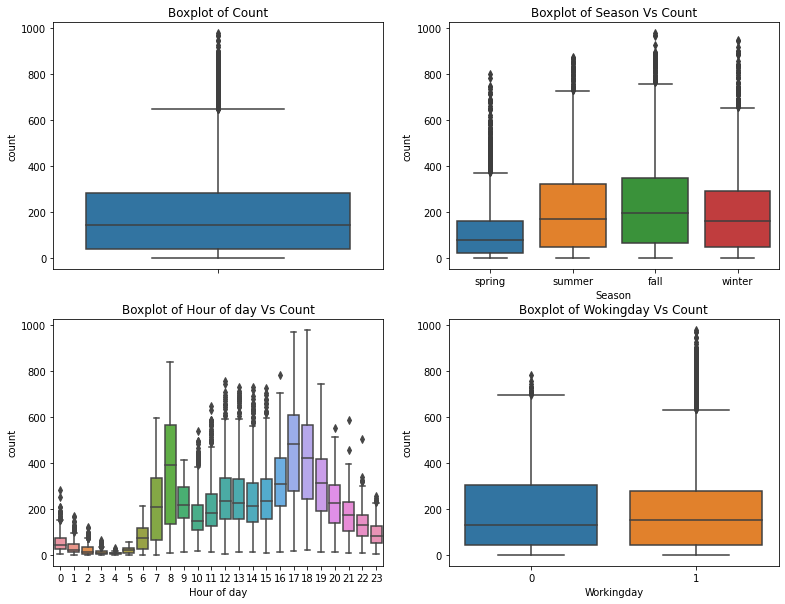

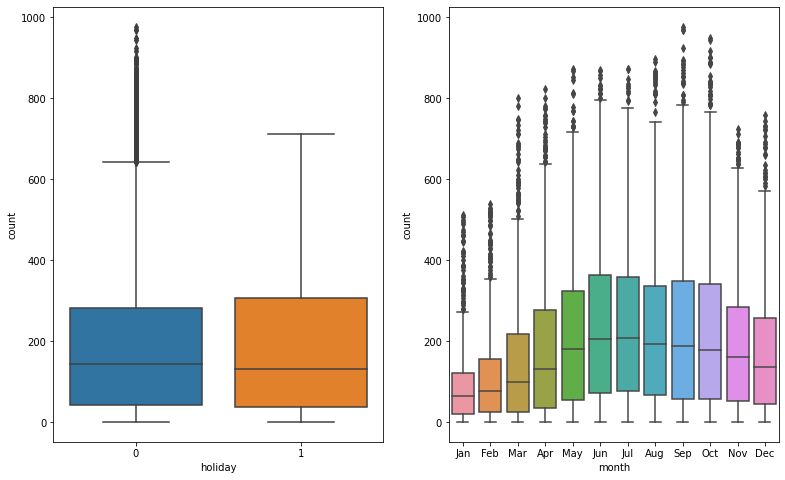

In [11]:
## Detect outlier
# Draw boxplots
fig, axes = plt.subplots(2,2,figsize = (13,10))
ax1 = plt.subplot(2,2,1)
sns.boxplot(y="count" ,data=all_data.loc[all_data.traintest=='train'],
              ax = ax1)
ax1.set(ylabel='count',title = 'Boxplot of Count')

ax2 = plt.subplot(2,2,2)
sns.boxplot(x="season", y="count",data=all_data.loc[all_data.traintest=='train'],
              ax = ax2)
ax2.set(xlabel='Season',title = 'Boxplot of Season Vs Count')

ax3 = plt.subplot(2,2,3)
sns.boxplot(x="hour_of_day", y="count",data=all_data.loc[all_data.traintest=='train'],
              ax = ax3)
ax3.set(xlabel='Hour of day',title = 'Boxplot of Hour of day Vs Count')

ax4 = plt.subplot(2,2,4)
sns.boxplot(x="workingday", y="count",data=all_data.loc[all_data.traintest=='train'],
              ax = ax4)
ax4.set(xlabel='Workingday',title = 'Boxplot of Wokingday Vs Count')

fig, axes = plt.subplots(1,2,figsize = (13,8))
axes1 = plt.subplot(1,2,1)
sns.boxplot(x="holiday", y="count",data=all_data.loc[all_data.traintest=='train'],
              ax = axes1)
ax.set(xlabel='Holiday',title = 'Boxplot of Holiday Vs Count')

axes2 = plt.subplot(1,2,2)
sns.boxplot(x="month", y="count",data=all_data.loc[all_data.traintest=='train'],
              ax = axes2)
ax.set(xlabel='Month',title = 'Boxplot of Month Vs Count')

# According to the boxplots, there may be some outliers.

### TROUBLE IN OUTLIERS
##outlier = all_data[np.abs(all_data["count"]-all_data["count"].mean())<=(3*all_data["count"].std())] 

##len(all_data.loc[all_data.traintest=='train'][outlier['count'].values])    

##len(all_data.loc[all_data.traintest=='train'][goodpoints['count'].values])
##all_data=pd.concat((all_data.loc[all_data.traintest=='train'][goodpoints['count'].values],all_data.loc[all_data.traintest=='test']))


<AxesSubplot:ylabel='Density'>

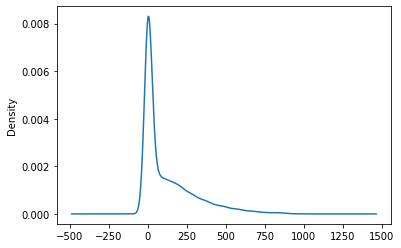

In [12]:
## Distribution of the data
all_data['count'].plot(kind = 'density')

<AxesSubplot:ylabel='Density'>

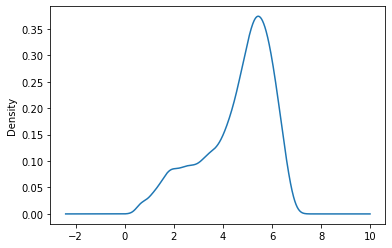

In [13]:
## log transformation 
import math
all_data.loc[all_data.traintest=='train',["count"]]['count'].apply(lambda x:math.log(1+x)).plot(kind='kde')

## Both the original and the transformed data are not completely normal distributtion.

In [14]:
scaler = StandardScaler()
temp_scale_param = scaler.fit(all_data[['temp']])
all_data['temp_scaled'] = scaler.fit_transform(all_data[['temp']], temp_scale_param)

scaler = StandardScaler()
atemp_scale_param = scaler.fit(all_data[['atemp']])
all_data['atemp_scaled'] = scaler.fit_transform(all_data[['atemp']], atemp_scale_param)


In [16]:
## Linear Regression
#train_x=train.drop(['count','casual','registered'],axis=1)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_data=train.drop(['datetime','casual', 'registered', 'count'], axis=1)
test_data=test.drop(['datetime'], axis=1)
yLabels = train["count"]
yLabelsLog = np.log1p(yLabels)

cv = KFold(n_splits=10, random_state=1,shuffle=True)
lm = LinearRegression()
lm_cv = cross_val_score(lm, train_data, yLabelsLog, scoring="neg_mean_squared_error", cv = cv)
model_lm = lm.fit(train_data,yLabelsLog)
predicts_lm = model_lm.predict(train_data)

MSE_lm = np.mean(np.abs(lm_cv))
RMSE_lm = np.sqrt(np.mean(np.abs(lm_cv)))

MSLE_lm = mean_squared_log_error(np.exp(yLabelsLog),np.exp(predicts_lm))
RMSLE_lm = np.sqrt(mean_squared_log_error(np.exp(yLabelsLog),np.exp(predicts_lm)))

print("For Linear Regression Model,")
print("MSE:",MSE_lm)
print("RMSE:",RMSE_lm)
print("\n")
print("For Linear Regression Model using training data,")
print("MSLE:",MSLE_lm)
print("RMSLE:",RMSLE_lm)


For Linear Regression Model,
MSE: 1.4873673461707244
RMSE: 1.2195767077846003


For Linear Regression Model using training data,
MSLE: 1.3736977913527484
RMSLE: 1.17204854479358


In [17]:
## Ridge model
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_data=train.drop(['datetime','casual', 'registered', 'count'], axis=1)
test_data=test.drop(['datetime'], axis=1)
yLabels = train["count"]
yLabelsLog = np.log1p(yLabels)

cv = KFold(n_splits=10, random_state=1,shuffle=True)
ridge = RidgeCV(alphas=[0.1, 1, 2, 3, 4, 10, 30,100,200])
ridge_cv = cross_val_score(ridge, train_data, yLabelsLog, scoring="neg_mean_squared_error", cv = cv)

model_ridge=ridge.fit(train_data,yLabelsLog)
predicts_ridge = ridge.predict(train_data)

MSE_ridge = np.mean(np.abs(ridge_cv))
RMSE_ridge = np.sqrt(np.mean(np.abs(ridge_cv)))

MSLE_ridge = mean_squared_log_error(np.exp(yLabelsLog),np.exp(predicts_ridge))
RMSLE_ridge = np.sqrt(mean_squared_log_error(np.exp(yLabelsLog),np.exp(predicts_ridge)))


print("For Ridge Regression Model,")
print("MSE:",MSE_ridge)
print("RMSE:",RMSE_ridge)
print("\n")
print("For Ridge Regression Model using training data,")
print("MSLE:",MSLE_ridge)
print("RMSLE:",RMSLE_ridge)



For Ridge Regression Model,
MSE: 1.487384108175488
RMSE: 1.2195835798236576


For Ridge Regression Model using training data,
MSLE: 1.3737129202050813
RMSLE: 1.1720549987970195


In [18]:
## Lasso model
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_data=train.drop(['datetime','casual', 'registered', 'count'], axis=1)
test_data=test.drop(['datetime'], axis=1)
yLabels = train["count"]
yLabelsLog = np.log1p(yLabels)

cv = KFold(n_splits=10, random_state=1,shuffle=True)
lasso = LassoCV(alphas=[0.1, 1, 2, 3, 4, 10, 30,100,200])
lasso_cv = cross_val_score(lasso, train_data, yLabelsLog, scoring="neg_mean_squared_error", cv = cv)

model_lasso=lasso.fit(train_data,yLabelsLog)
predicts_lasso = lasso.predict(train_data)

MSE_lasso = np.mean(np.abs(lasso_cv))
RMSE_lasso = np.sqrt(np.mean(np.abs(lasso_cv)))

MSLE_lasso = mean_squared_log_error(np.exp(yLabelsLog),np.exp(predicts_lasso))
RMSLE_lasso= np.sqrt(mean_squared_log_error(np.exp(yLabelsLog),np.exp(predicts_lasso)))


print("For Lasso Regression Model,")
print("MSE:",MSE_lasso)
print("RMSE:",RMSE_lasso)
print("\n")
print("For Lasso Regression Model using training data,")
print("MSLE:",MSLE_lasso)
print("RMSLE:",RMSLE_lasso)


For Lasso Regression Model,
MSE: 1.5019273634014803
RMSE: 1.2255314616122592


For Lasso Regression Model using training data,
MSLE: 1.3870684398815505
RMSLE: 1.1777386976242015


In [19]:
## Random Forest
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_data=train.drop(['datetime','casual', 'registered', 'count'], axis=1)
test_data=test.drop(['datetime'], axis=1)
yLabels = train["count"]
yLabelsLog = np.log1p(yLabels)

cv = KFold(n_splits=10, random_state=1,shuffle=True)
rf = RandomForestRegressor()
model_rf = rf.fit(train_data,yLabelsLog)
rf_cv = cross_val_score(rf, train_data, yLabelsLog, scoring="neg_mean_squared_error", cv = cv)
predicts_rf = rf.predict(train_data)

MSE_rf = np.mean(np.abs(rf_cv))
RMSE_rf = np.sqrt(np.mean(np.abs(rf_cv)))

MSLE_rf = mean_squared_error(yLabelsLog,predicts_rf)
RMSLE_rf= np.sqrt(mean_squared_error(yLabelsLog,predicts_rf))


print("For Random Forest Regression Model,")
print("MSE:",MSE_rf)
print("RMSE:",RMSE_rf)
print("\n")
print("For Random Foerst Model using training data,")
print("MSLE:",MSLE_rf)
print("RMSLE:",RMSLE_rf)


For Random Forest Regression Model,
MSE: 1.3673874524008247
RMSE: 1.1693534334840021


For Random Foerst Model using training data,
MSLE: 0.3546325169223601
RMSLE: 0.5955102995938526


In [20]:
## Random Forest
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_data=train.drop(['datetime','casual', 'registered', 'count'], axis=1)
test_data=test.drop(['datetime'], axis=1)
yLabels = train["count"]
yLabelsLog = np.log1p(yLabels)

def split_data_train_model(new_y, x):
    # 20% examples in test data
    train_x, test_x, train_y, test_y = train_test_split(x,new_y,
                                                              test_size=0.2,
                                                              random_state=42)
 
    # training data fit
    rf = RandomForestRegressor(n_estimators=1000, random_state=42)
    rf.fit(train_data, yLabelsLog)
 
    return train_x, test_x,train_y, test_y, rf

x_train,x_test,y_train, y_test, rfregressor = split_data_train_model(yLabelsLog, train_data)

predictions_train = rfregressor.predict(x_train)

MSLE_train = mean_squared_error(y_train,predictions_train)
RMSLE_train = np.sqrt(mean_squared_error(y_train,predictions_train))

predictions_test = rfregressor.predict(x_test)

MSLE_test = mean_squared_error(y_test,predictions_test)
RMSLE_test = np.sqrt(mean_squared_error(y_test,predictions_test))

print("After the Random Forest Regression Model splitted data,for the train dataset")
print("MSLE:",MSLE_train)
print("RMSLE:",RMSLE_train)
print("\n")
print("For Random Foerst Model after splitting data,we use test data to predict,")
print("MSLE:",MSLE_test)
print("RMSLE:",RMSLE_test)

After the Random Forest Regression Model splitted data,for the train dataset
MSLE: 0.3487338580534611
RMSLE: 0.5905369235310025


For Random Foerst Model after splitting data,we use test data to predict,
MSLE: 0.34753216205159526
RMSLE: 0.5895185849925304


In [21]:
## Gradient Boosting Regression

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_data=train.drop(['datetime','casual', 'registered', 'count'], axis=1)
test_data=test.drop(['datetime'], axis=1)
yLabels = train["count"]
yLabelsLog = np.log1p(yLabels)

cv = KFold(n_splits=10, random_state=1,shuffle=True)
gbr = GradientBoostingRegressor()
model_gbr = gbr.fit(train_data,yLabelsLog)
gbr_cv = cross_val_score(gbr, train_data, yLabelsLog, scoring="neg_mean_squared_error", cv = cv)

predicts_gbr = gbr.predict(train_data)
MSE_gbr = np.mean(np.abs(gbr_cv))
RMSE_gbr = np.sqrt(np.mean(np.abs(gbr_cv)))

MSLE_gbr = mean_squared_error(yLabelsLog,predicts_gbr)
RMSLE_gbr= np.sqrt(mean_squared_error(yLabelsLog,predicts_gbr))


print("For Gradient Boosting Regression Model,")
print("MSE:",MSE_gbr)
print("RMSE:",RMSE_gbr)
print("\n")
print("For Gradient Boosting Regression Model using training data,")
print("MSLE:",MSLE_gbr)
print("RMSLE:",RMSLE_gbr)


For Gradient Boosting Regression Model,
MSE: 1.3629868121967272
RMSE: 1.1674702618040116


For Gradient Boosting Regression Model using training data,
MSLE: 1.3190668593644546
RMSLE: 1.1485063601758827
